# Consigna 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl

import warnings #Eliminando advertencias
warnings.filterwarnings('ignore')

#Import the data
from sklearn.datasets import load_wine
data=load_wine() #Original
print(list(data)) #Let's see...
type(data)



['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']


sklearn.utils.Bunch

In [2]:
print(data['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
print(data['target_names'])

['class_0' 'class_1' 'class_2']


In [4]:
print(data['data'])

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [5]:
#Convert to pandas dataframe.
dataX,dataY=pd.DataFrame(data=data.data,columns=data.feature_names),pd.DataFrame(data=data.target,columns=["Quality_Type"])
dataX.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
#Escalado
from sklearn import preprocessing
mm = preprocessing.MinMaxScaler()
dataSX = mm.fit(dataX).transform(dataX)
dataSY = mm.fit(dataY).transform(dataY)

dataSXPD = pd.DataFrame(dataSX, columns=data.feature_names)
dataSXPD.head()
dataSYPD = pd.DataFrame(dataSY, columns=["Quality_Type"])

dataSXPD.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [7]:
#Dividing datasets
training_data=int(0.8*len(dataX)) #142 datos

train_dataX=dataX[:training_data] #Training
train_dataY=dataY[:training_data]
test_dataX=dataX[training_data:] #Testing
test_dataY=dataY[training_data:]

######################################################################

train_dataSX=dataSXPD[:training_data] #Training
train_dataSY=dataSYPD[:training_data]
test_dataSX=dataSXPD[training_data:] #Testing
test_dataSY=dataSYPD[training_data:]

#Me pide 1d array
train_dataY, test_dataY  = np.ravel(train_dataY), np.ravel(test_dataY) 
train_dataSY, test_dataSY = np.ravel(train_dataSY), np.ravel(test_dataSY)

#Porque me da error de valores continuos en el target
train_dataSY = preprocessing.LabelEncoder().fit_transform(train_dataSY)
test_dataSY = preprocessing.LabelEncoder().fit_transform(test_dataSY)



# Consigna 2

In [8]:
from sklearn import neighbors


n_neighbors=10
#Original
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(train_dataX,train_dataY)
#Scaled
knns = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knns.fit(train_dataSX,train_dataSY)

KNeighborsClassifier(n_neighbors=10)

In [9]:
#Predicción
Y_pred = knn.predict(test_dataX)
SY_pred = knns.predict(test_dataSX)
print(Y_pred)
print(SY_pred)

[1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
knn.score(test_dataX, test_dataY) #Testeando modelo con datos de validación

0.0

In [11]:
knns.score(test_dataSX, test_dataSY)

0.027777777777777776

# Consigna 3

In [12]:
from sklearn.tree import DecisionTreeClassifier

Tree=DecisionTreeClassifier(max_depth=2)
TreeS=DecisionTreeClassifier(max_depth=2)
#Training
Tree.fit(train_dataX, train_dataY) 
TreeS.fit(train_dataSX, train_dataSY)

#Testing
Tree.score(test_dataX, test_dataY) 

0.7222222222222222

In [13]:
TreeS.score(test_dataSX, test_dataSY)

0.1388888888888889

# Consigna 4

In [14]:
#Reducción de dimensiones
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(dataSX)

Tpca=pca.transform(dataSX)
print(Tpca.shape)

(178, 2)


Text(0, 0.5, 'Componente 2')

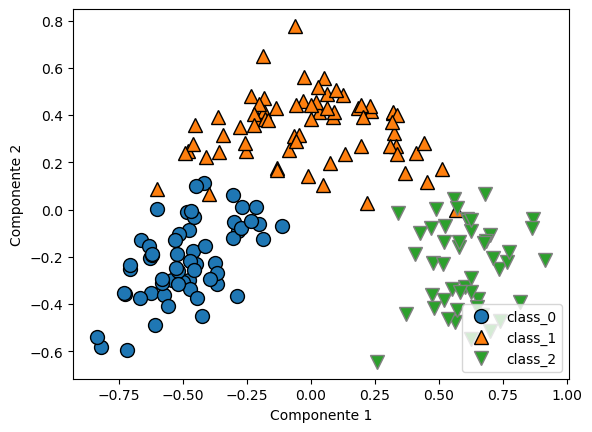

In [15]:
#Grafico del PCA
import mglearn

mglearn.discrete_scatter(Tpca[:,0], Tpca[:,1], data.target)
plt.legend(data.target_names, loc='lower right')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Consigna 5

In [16]:
#Aplicando KMeans
from sklearn.cluster import KMeans
from sklearn import metrics


k_means = KMeans(n_clusters=3, max_iter=1500) 
k_means.fit(Tpca)

Tpca_Prediction=k_means.predict(Tpca)

score=metrics.adjusted_rand_score(data.target, Tpca_Prediction) #Coincidencia del modelo
print(score) #84,7% mmh.... Not so good

0.8470966807514034


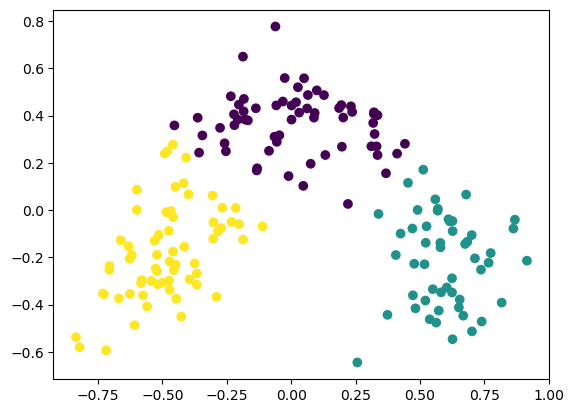

In [17]:
#Gráfico de predicción
plt.scatter(Tpca[:, 0], Tpca[:, 1], c=Tpca_Prediction)

Looks good so far...

0.8470966807514034


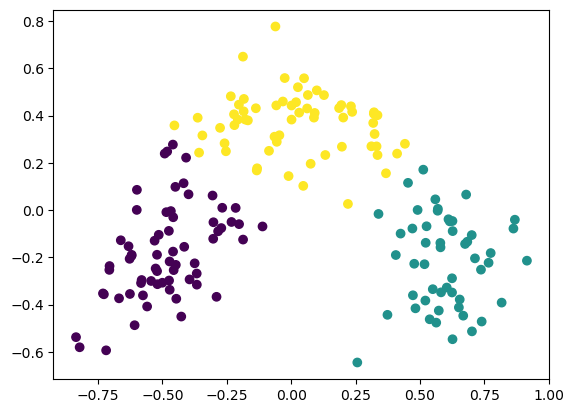

In [18]:
#KMeans por mini-batch
from sklearn.cluster import MiniBatchKMeans

k_meansMB = MiniBatchKMeans(n_clusters=3, max_iter=1500)
k_means.fit(Tpca)

Tpca_MBPred=k_means.predict(Tpca) #Predicción

scoreMB=metrics.adjusted_rand_score(data.target, Tpca_MBPred) #Comparando resultado con etiquetas
print(scoreMB) #Same result as before...

plt.scatter(Tpca[:, 0], Tpca[:, 1], c=Tpca_MBPred)
plt.show()
